# News topic modelling

The goal of this notebook is to explore a kagglw news dataset and discover its topics asserting these topics have sense from a human prespective

## Loading data and models 
Best gridsearch combination of hyperparameters results & visualitzation

In [1]:
import matplotlib.pyplot as plt
from __future__ import print_function
import pyLDAvis
import pyLDAvis.sklearn
import pandas as pd
import numpy as np
import joblib
import pickle
from nltk import word_tokenize
from nltk.stem.porter import PorterStemmer
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import tokenize
% matplotlib inline

In [2]:
# Loading raw data
data_filename = "../../data/articles1.csv"
data = pd.read_csv(data_filename)
print(data.shape)
data

(50000, 10)


,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."
5,5,17288,"Sick With a Cold, Queen Elizabeth Misses New Y...",New York Times,Sewell Chan,2017-01-02,2017.0,1.0,NaN,"LONDON — Queen Elizabeth II, who has been b..."
6,6,17289,Taiwan’s President Accuses China of Renewed In...,New York Times,Javier C. Hernández,2017-01-02,2017.0,1.0,NaN,BEIJING — President Tsai of Taiwan sharpl...
7,7,17290,"After ‘The Biggest Loser,’ Their Bodies Fought...",New York Times,Gina Kolata,2017-02-08,2017.0,2.0,NaN,"Danny Cahill stood, slightly dazed, in a blizz..."
8,8,17291,"First, a Mixtape. Then a Romance. - The New Yo...",New York Times,Katherine Rosman,2016-12-31,2016.0,12.0,NaN,"Just how is Hillary Kerr, the founder of ..."
9,9,17292,Calling on Angels While Enduring the Trials of...,New York Times,Andy Newman,2016-12-31,2016.0,12.0,NaN,Angels are everywhere in the Muñiz family’s ap...


In [3]:
# Loading vectorizer
with open("../../data/vectorizer.pkl", "rb") as f:
    vectorizer = pickle.load(f)
vectorizer

CountVectorizer(analyzer=u'word', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=0.8, max_features=None, min_df=10,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=<module 'tokenize' from '/home/centos/anaconda2/envs/exploration_python2/lib/python2.7/tokenize.pyc'>,
        vocabulary=None)

In [4]:
# Loading vectorized documents
with open("../../data/numpy_vectorized_term_matrix.pkl", "rb") as f:
    vectorized_documents = pickle.load(f)
vectorized_documents

<50000x25956 sparse matrix of type '<type 'numpy.int64'>'
	with 10249210 stored elements in Compressed Sparse Row format>

In [5]:
# Loading LDA model
with open("../src/lda_grid_model.pkl", "rb") as f:
    model = pickle.load(f)
best_lda_model = model.best_estimator_
model

GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=12,
             n_topics=None, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0),
       fit_params=None, iid=True, n_jobs=5,
       param_grid={'learning_decay': [0.7], 'n_components': [10, 20, 30, 40, 50]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [6]:
best_lda_model

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=10.0, max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=20, n_jobs=12,
             n_topics=None, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0)

In [7]:
# Data tokenitzation method
def tokenize(text):
    """
    English tokenitzation function
    Applied filters:
    * Min length words filter
    * Lower case transformation
    * Literals filter (no numbers either punctuation allows)
    * Stem filter (PorterStemmer to remove morphological affixes)
    * Stop words filter
    @TODO - lemmaritzxation
    @PoS Tagging
    """
    cachedStopWords = stopwords.words("english")
    min_length = 3
    words = map(lambda word: word.lower(), word_tokenize(text));
    words = [word for word in words
                  if word not in cachedStopWords]
    tokens =(list(map(lambda token: PorterStemmer().stem(token),
                  words)));
    p = re.compile('[a-zA-Z]+');
    filtered_tokens = list(filter(lambda token: p.match(token) and 
                                  len(token)>=min_length, tokens));
    return filtered_tokens

# Visualitzations

/home/centos/anaconda2/envs/exploration_python2/lib/python2.7/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


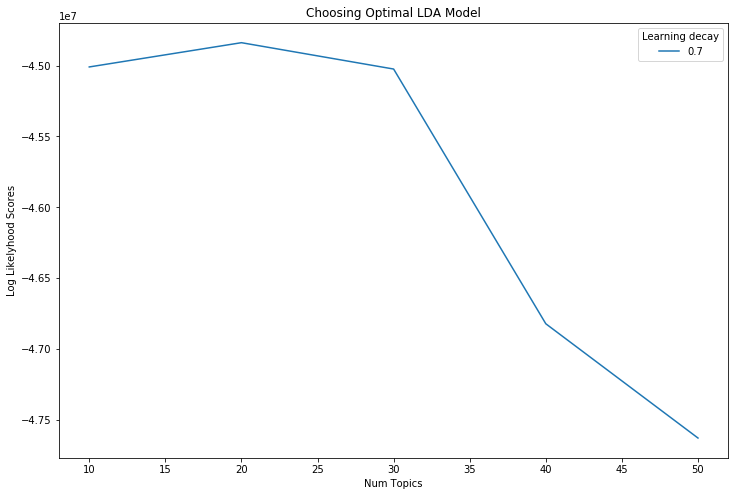

In [8]:
num_categories = 60

# Get Log Likelyhoods from Grid Search Output
n_topics = [i for i in xrange(10,num_categories,10)]
log_likelyhoods_7 = [round(gscore.mean_validation_score) for gscore in model.grid_scores_ if gscore.parameters['learning_decay']==0.7]

# Show graph
plt.figure(figsize=(12, 8))
plt.plot(n_topics, log_likelyhoods_7, label='0.7')
plt.title("Choosing Optimal LDA Model")
plt.xlabel("Num Topics")
plt.ylabel("Log Likelyhood Scores")
plt.legend(title='Learning decay', loc='best')
plt.show()

In [9]:
#PyLDAvis visualitzation
pyLDAvis.enable_notebook()
pyLDAvis.sklearn.prepare(best_lda_model, vectorized_documents, vectorizer, mds='mmds')

/home/centos/anaconda2/envs/exploration_python2/lib/python2.7/site-packages/pyLDAvis/_prepare.py:387: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  topic_term_dists = topic_term_dists.ix[topic_order]


PreparedData(topic_coordinates=            Freq  cluster  topics         x         y
topic                                                
11     12.816080        1       1  0.019115  0.060343
7       8.602257        1       2 -0.319818 -0.082167
12      6.332423        1       3 -0.048862  0.180585
1       5.867362        1       4 -0.124030 -0.257841
13      5.820579        1       5 -0.074525  0.325784
6       5.734599        1       6 -0.284130  0.131465
4       5.293430        1       7 -0.228809 -0.003240
3       5.250795        1       8 -0.233980 -0.208686
18      4.912503        1       9  0.042754 -0.324049
17      4.827816        1      10  0.049598 -0.211145
15      4.767017        1      11 -0.029545 -0.152431
0       4.509061        1      12  0.076342  0.262409
9       4.438230        1      13 -0.147957 -0.084227
16      4.409050        1      14  0.165381 -0.010603
19      3.370657        1      15 -0.230476  0.288778
8       3.017470        1      16  0.228570  0.244466
5       2.924203        1      17  0.230635 -0.245081
10      2.824805        1      18  0.259933 -0.087280
14      2.226191        1      19  0.354490  0.023456
2       2.055471        1      20  0.295316  0.149466, topic_info=      Category           Freq        Term          Total  loglift  logprob
term                                                                      
23622  Default  150752.000000       trump  150752.000000  30.0000  30.0000
4293   Default   54642.000000     clinton   54642.000000  29.0000  29.0000
17512  Default   31249.000000       polic   31249.000000  28.0000  28.0000
19823  Default  203202.000000        said  203202.000000  27.0000  27.0000
19073  Default   36181.000000  republican   36181.000000  26.0000  26.0000
17835  Default   66372.000000      presid   66372.000000  25.0000  25.0000
4578   Default   24899.000000     compani   24899.000000  24.0000  24.0000
23771  Default   25713.000000     twitter   25713.000000  23.0000  23.0000
24898  Default   25920.000000        vote   25920.000000  22.0000  22.0000
5911   Default   29424.000000    democrat   29424.000000  21.0000  21.0000
25534  Default   20857.000000       women   20857.000000  20.0000  20.0000
6558   Default   28903.000000      donald   28903.000000  19.0000  19.0000
3347   Default   35143.000000    campaign   35143.000000  18.0000  18.0000
21793  Default   77714.000000       state   77714.000000  17.0000  17.0000
15148  Default   54171.000000         mr.   54171.000000  16.0000  16.0000
5099   Default   18968.000000       court   18968.000000  15.0000  15.0000
17037  Default   16997.000000     percent   16997.000000  14.0000  14.0000
7092   Default   26501.000000       elect   26501.000000  13.0000  13.0000
15610  Default   34722.000000        news   34722.000000  12.0000  12.0000
10767  Default   33320.000000        hous   33320.000000  11.0000  11.0000
1395   Default   28613.000000      attack   28613.000000  10.0000  10.0000
11652  Default   20452.000000    investig   20452.000000   9.0000   9.0000
24901  Default   14600.000000       voter   14600.000000   8.0000   8.0000
10485  Default   19806.000000     hillari   19806.000000   7.0000   7.0000
20400  Default   18492.000000       senat   18492.000000   6.0000   6.0000
10247  Default   13321.000000      health   13321.000000   5.0000   5.0000
25742  Default   66719.000000        year   66719.000000   4.0000   4.0000
19043  Default   50347.000000      report   50347.000000   3.0000   3.0000
12935  Default   24985.000000         law   24985.000000   2.0000   2.0000
16099  Default   33169.000000       offic   33169.000000   1.0000   1.0000
...        ...            ...         ...            ...      ...      ...
22383  Topic20    1077.669710     surgeri    1329.652220   3.6745  -5.7793
23507  Topic20    2373.730569   treatment    3267.409094   3.5651  -4.9896
10247  Topic20    8060.219598      health   13321.370868   3.3822  -3.7672
14318  Topic20    1020.155198     medicin    1271.035240   3.6648  -5

In [10]:
# Calculating topic probability per each doc 
lda_output = best_lda_model.transform(vectorized_documents)

In [11]:
# Priting dominant topic probabilities

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(data.shape[0])]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,Topic10,Topic11,Topic12,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18,Topic19,dominant_topic
Doc0,0,0.26,0,0,0,0.02,0,0.03,0,0,0,0.06,0,0,0,0,0.07,0.56,0.01,0,17
Doc1,0.06,0.04,0.02,0,0.02,0,0.44,0,0.05,0,0,0.14,0.18,0.01,0,0,0.03,0,0.01,0,6
Doc2,0.26,0.05,0,0.01,0,0,0,0,0.01,0.03,0.01,0.07,0.14,0.27,0,0.03,0.07,0,0,0.06,13
Doc3,0.06,0.02,0.03,0.07,0,0.1,0.01,0,0.02,0,0.01,0.12,0.03,0.49,0,0.02,0,0,0.01,0.01,13
Doc4,0,0.03,0,0.02,0,0,0,0.08,0,0.08,0.61,0,0,0,0.01,0.15,0,0,0,0,10
Doc5,0.16,0,0.1,0.07,0,0,0,0,0,0,0,0,0,0.61,0,0.06,0,0,0,0,13
Doc6,0.04,0,0.01,0.03,0.01,0,0.02,0.06,0,0.04,0,0,0,0.02,0,0.78,0,0,0,0,15
Doc7,0.02,0,0.05,0,0,0.05,0,0,0.03,0,0,0.23,0.15,0.02,0.4,0,0,0,0.05,0.01,14
Doc8,0.03,0.02,0,0.01,0.03,0.08,0,0,0,0,0,0.06,0.22,0.48,0.01,0,0.02,0,0,0.03,13
Doc9,0.14,0,0.1,0,0,0,0,0,0,0,0,0.09,0.45,0.11,0,0,0.11,0,0,0,12


## Topic summaritzation

In [12]:
from nltk import FreqDist

In [13]:
# Ading titles and content to dominant topic DF

dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic["headline"] = data["title"].values
df_document_topic["content"] = data["content"].values
df_document_topic

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,...,Topic13,Topic14,Topic15,Topic16,Topic17,Topic18,Topic19,dominant_topic,headline,content
Doc0,0.00,0.26,0.00,0.00,0.00,0.02,0.00,0.03,0.00,0.00,...,0.00,0.00,0.00,0.07,0.56,0.01,0.00,17,House Republicans Fret About Winning Their Hea...,WASHINGTON — Congressional Republicans have...
Doc1,0.06,0.04,0.02,0.00,0.02,0.00,0.44,0.00,0.05,0.00,...,0.01,0.00,0.00,0.03,0.00,0.01,0.00,6,Rift Between Officers and Residents as Killing...,"After the bullet shells get counted, the blood..."
Doc2,0.26,0.05,0.00,0.01,0.00,0.00,0.00,0.00,0.01,0.03,...,0.27,0.00,0.03,0.07,0.00,0.00,0.06,13,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...","When Walt Disney’s “Bambi” opened in 1942, cri..."
Doc3,0.06,0.02,0.03,0.07,0.00,0.10,0.01,0.00,0.02,0.00,...,0.49,0.00,0.02,0.00,0.00,0.01,0.01,13,"Among Deaths in 2016, a Heavy Toll in Pop Musi...","Death may be the great equalizer, but it isn’t..."
Doc4,0.00,0.03,0.00,0.02,0.00,0.00,0.00,0.08,0.00,0.08,...,0.00,0.01,0.15,0.00,0.00,0.00,0.00,10,Kim Jong-un Says North Korea Is Preparing to T...,"SEOUL, South Korea — North Korea’s leader, ..."
Doc5,0.16,0.00,0.10,0.07,0.00,0.00,0.00,0.00,0.00,0.00,...,0.61,0.00,0.06,0.00,0.00,0.00,0.00,13,"Sick With a Cold, Queen Elizabeth Misses New Y...","LONDON — Queen Elizabeth II, who has been b..."
Doc6,0.04,0.00,0.01,0.03,0.01,0.00,0.02,0.06,0.00,0.04,...,0.02,0.00,0.78,0.00,0.00,0.00,0.00,15,Taiwan’s President Accuses China of Renewed In...,BEIJING — President Tsai of Taiwan sharpl...
Doc7,0.02,0.00,0.05,0.00,0.00,0.05,0.00,0.00,0.03,0.00,...,0.02,0.40,0.00,0.00,0.00,0.05,0.01,14,"After ‘The Biggest Loser,’ Their Bodies Fought...","Danny Cahill stood, slightly dazed, in a blizz..."
Doc8,0.03,0.02,0.00,0.01,0.03,0.08,0.00,0.00,0.00,0.00,...,0.48,0.01,0.00,0.02,0.00,0.00,0.03,13,"First, a Mixtape. Then a Romance. - The New Yo...","Just how is Hillary Kerr, the founder of ..."
Doc9,0.14,0.00,0.10,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.11,0.00,0.00,0.11,0.00,0.00,0.00,12,Calling on Angels While Enduring the Trials of...,Angels are everywhere in the Muñiz family’s ap...


## Computing Gold standard summaritzation based on headlines

In [15]:
# Obtaining summaritzation based in headlines (gold standard)
# 1- group docs by dominant topic
# 2- Obtain all headlines per doc
# 3- Obtain most common words for each topic, considering all headlines in each topic
common_tokens = list()
concatenated_headlines = df_document_topic.groupby("dominant_topic")["headline"].apply(lambda x: " ".join(x)).to_frame()
print(concatenated_headlines.head())

for topic_id, headlines in enumerate(concatenated_headlines["headline"].values):
    common_tokens.append([token[0] for token in FreqDist(tokenize(headlines.decode('utf-8'))).most_common(20)]) 

df_topic_keywords = pd.DataFrame(common_tokens)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

                                                         headline
dominant_topic                                                   
0               As Second Avenue Subway Opens, a Train Delay E...
1               Dylann Roof Himself Rejects Best Defense Again...
2               After One-Child Policy, Outrage at China’s Off...
3               In Turkey, U.S. Hand Is Seen in Nearly Every C...
4               Trump Appears to Side With Assange Over Intell...


,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,new,york,time,breitbart,california,migrant,flood,trump,hurrican,storm,fire,citi,dead,world,today,earthquak,say,kill,home,matthew
Topic 1,breitbart,trump,new,time,york,court,immigr,illeg,border,texa,ban,suprem,obama,judg,law,alien,case,order,deport,sanctuari
Topic 2,new,breitbart,time,york,plan,parenthood,drug,abort,cancer,zika,health,say,doctor,studi,women,babi,care,case,death,report
Topic 3,breitbart,trump,new,time,york,muslim,islam,milo,protest,christian,obama,pope,student,state,say,attack,univers,gay,ban,black
Topic 4,breitbart,trump,clinton,new,hillari,time,york,russia,email,comey,fbi,investig,russian,hous,hack,report,obama,say,white,campaign
Topic 5,breitbart,new,time,york,win,olymp,rio,game,nfl,team,player,open,trump,kaepernick,sport,final,world,play,nba,first
Topic 6,breitbart,polic,new,york,time,attack,kill,shoot,gun,man,suspect,arrest,offic,say,trump,texa,terror,shot,charg,protest
Topic 7,trump,breitbart,donald,new,clinton,time,york,hillari,cruz,obama,news,campaign,presid,debat,ted,gop,rubio,say,call,media
Topic 8,breitbart,new,time,york,trump,job,american,economi,market,rate,year,stock,report,fed,immigr,econom,u.s.,obama,worker,donald
Topic 9,new,time,york,breitbart,syria,isi,trump,state,islam,kill,attack,u.s.,iran,syrian,russia,say,obama,bomb,war,militari


## Computing baseline based on LDA word probability for each topic

In [16]:
# Show top n keywords for each topic based on topic/word probability
def show_topics(vectorizer=vectorized_documents, lda_model=best_lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords

topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=20)

# Defining baseline
baseline_top_terms = topic_keywords

# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
Topic 0,citi,said,peopl,new,area,build,one,water,year,home,park,south,day,mani,resid,island,nation,town,hous,storm
Topic 1,court,state,law,immigr,case,feder,justic,judg,order,legal,said,breitbart,texa,illeg,border,rule,attorney,would,right,execut
Topic 2,women,health,drug,medic,said,abort,patient,doctor,care,hospit,dr.,peopl,case,children,diseas,cancer,treatment,death,report,men
Topic 3,muslim,islam,countri,peopl,group,nation,right,refuge,american,state,polit,protest,commun,christian,presid,america,support,speech,govern,also
Topic 4,said,investig,clinton,report,russian,russia,email,offici,fbi,intellig,presid,inform,hous,state,comey,depart,committe,secur,former,director
Topic 5,game,team,player,play,sport,first,win,olymp,year,season,said,final,two,time,athlet,second,last,footbal,one,world
Topic 6,polic,said,offic,attack,kill,report,gun,peopl,man,shoot,arrest,two,investig,one,death,accord,victim,citi,shot,told
Topic 7,trump,presid,said,donald,say,campaign,news,mr.,obama,twitter,republican,presidenti,cnn,breitbart,cruz,rubio,call,new,white,sen.
Topic 8,year,percent,rate,american,job,increas,number,worker,million,econom,report,market,economi,per,accord,countri,sinc,growth,price,last
Topic 9,said,isi,militari,state,attack,forc,syria,war,group,unit,iraq,iran,offici,syrian,secur,govern,terrorist,kill,islam,countri


## Computing SUM BASIC Sumaritzation

In [58]:
# SUM Basic functions 

import re
import sys
#reload(sys)
#sys.setdefaultencoding("utf-8")
import nltk.data
import string
from nltk.tokenize import word_tokenize
import numpy as numpy
from numpy import ndarray

'''
100-word summaries using SumBasic
python ./sumbasic.py simplified ./docs/doc1-*.txt > simplified-1.txt
'''

#Find word with highest probability in text
def highest_probability_word(wordprob_list):
    highest_pword = wordprob_list[0][0]
    return highest_pword

#Find sentences containing highest probability word
def sentences_with_highest_pword(wordprob_list, sentences):
    subset_sent = []
    highest_pword = highest_probability_word(wordprob_list)
    i = 0
    for s in sentences:
        if (highest_pword in s):
            #Add weight of s to subset_sent
            tmp = weighted[i]
            subset_sent.append(tmp)
        else:
            subset_sent.append(0)
        i+=1
    return subset_sent

#Find highest scoring sentence from a subset
def highest_scoring_sentence(subset_sent):
    max_val, j, max_pos = 0, 0, 0
    for i in subset_sent:
        if (i > max_val):
            max_val = i
            max_pos = j
        j+=1
    return (max_val, max_pos)

#Calculate weight of each sentence
#weight = average probability of words in sentence
def cal_weight(sentences, wordprob):
    weight_sentences = {}
    i = 0
    for s in sentences:
        num_words = len(s.split())
        sum_up = 0
        for w in s.split():
            sum_up += wordprob[w]
        sum_up = sum_up/num_words
        weight_sentences[i] = sum_up
        i+=1
    return weight_sentences
    '''for i in weight_sentences:
        print weight_sentences[i]'''

#Recalculate weight of each word in chosen sentence
#pnew = pold*pold
def recal_weight(chosen_sentence, wordprob):

    wordprob_new = wordprob
    for w in chosen_sentence.split():
        wordprob_new[w] = wordprob[w]*wordprob[w]
    return wordprob_new

In [105]:
total_words = sum(vectorizer.vocabulary_.values())
#Storing probability of each word
wordprob=dict()
for word, freq in vectorizer.vocabulary_.items():
    print(word,freq)
    wordprob[word] = freq / float(total_words)
wordprob

fawn 8031
woodi 25550
suzann 22432
francesco 8683
francesca 8682
scold 20178
accret 161
crossbar 5278
rickman 19308
corasan 4939
pigment 17263
politician 17527
broward 2988
viewabl 24754
elvi 7161
wooden 25548
showcas 20776
wednesday 25148
crotch 5288
guardsmen 9784
frederick 8726
sooth 21373
gorman 9500
dialogu 6129
nature. 15436
succumb 22220
kid. 12463
widget 25363
crouch 5289
china 4002
chino 4007
animals. 888
shock. 20723
deterior 6061
further. 8908
kumbaya 12695
oxymoron 16575
kidd 12464
neurologist 15572
climber 4285
controversi 4875
golden 9434
lengthen 13086
topographi 23315
sterl 21899
stern 21900
population. 17595
popular. 17593
agassi 384
dna 6488
dnc 6490
dni 6493
music 15272
catchi 3608
nebul 15486
expeditionari 7723
yahoo 25707
meteorologist 14499
hermann 10403
exce 7649
unpack 24231
adventist 308
locker 13393
matilda 14118
wang 24994
wand 24990
hyatt 10905
unjust 24185
titanium 23224
want 24997
pinto 17302
vicent 24718
travel 23484
cutback 5441
traver 23487
tchaikovski 

prelud 17795
erica 7443
intim 11612
imran 11171
innumer 11443
fadel 7859
neurosurgeri 15577
door. 6587
chad 3766
fans. 7938
chai 3773
chan 3800
chao 3818
char 3832
chap 3821
chat 3874
living. 13361
intrepid 11623
granada 9562
dummi 6815
stagecraft 21708
uranium 24446
furnac 8899
rubella 19650
swaraj 22457
flatbush 8367
bianca 2227
lufthansa 13576
interfaith 11557
lane 12822
land 12803
lanc 12799
lana 12797
watertown 25081
muñoz 15302
transient 23456
lans 12837
matine 14120
sonboli 21355
amish 756
foreknowledg 8569
broaden 2945
antisemit 970
sabbat 19762
totem 23350
cobalt 4376
broader 2946
amiss 757
flashback 8360
quarantin 18282
turkish 23710
iii 11026
carelessli 3478
sumter 22284
dickinson 6155
lapierr 12846
boatload 2514
disinvit 6361
democrat. 5912
nieto 15683
gurion 9854
counterproduct 5071
harbor 10086
fewer 8164
kansa 12284
leonardo 13103
adm. 266
mishap 14772
crook 5272
deplorabal 5970
video 24739
victor 24731
make. 13783
that. 22964
houthi 10777
demsinphilli 5924
evacu 7575
mu

pacif 16586
zedong 25884
theatric 22973
decid 5739
dune 6824
street. 22039
excess 7657
reality. 18610
arena 1158
republicain 19072
cathi 3623
heroin 10417
put 18228
tiegen 23152
inveter 11661
intergovernment 11561
budget. 3048
aso 1296
oecd 16087
formul 8611
bash 1859
brunswick 3011
reattach 18639
delusion 5885
jr. 12145
dion 6240
lazaru 12959
garza 9051
classmat 4221
lazard 12958
grill 9689
undemocrat 23972
pollack 17536
publicist 18136
kilgor 12474
phrase 17219
inescap 11331
anoth 920
jihadi 12027
sigourney 20884
reject 18908
schultz 20150
jarrett 11909
compulsori 4631
undergradu 23994
vintag 24793
coerciv 4406
sodomi 21276
lifetim 13222
esquir 7499
casablanca 3554
thermal 23010
icbm 10961
herod 10415
obscen 16029
helmand 10343
dailymail 5511
delici 5866
ceo 3735
musket 15276
inquisit 11453
charismat 3847
tsinghua 23652
ninja 15728
bryan 3019
mosbi 15066
system. 22562
fairi 7879
hero. 10414
predatori 17758
durden 6849
restless 19147
house. 10768
anarchi 813
heavi 10287
shriver 20802


tucker 23667
lunch 13601
teller 22840
ileana 11032
malnutrit 13827
workload 25585
feverish 8162
focuss 8487
trainwreck 23427
boehner 2531
lede 13022
massachusett 14076
maher 13745
motherland 15087
continu 4847
russia. 19726
manifesto 13879
honk 10673
conting 4846
stitch 21943
hydroelectr 10915
valdez 24537
bailout 1671
pamela 16667
wainwright 24944
afghani 358
romanc 19524
romano 19527
convention. 4882
ajay 480
zombi 25935
romant 19528
funki 8888
waiter 24950
frequenc 8762
diann 6138
assuredli 1335
registrar 18856
principl 17905
frequent 8763
first 8290
plebiscit 17419
sansa 19960
rachel 18376
housekeep 10771
tiebreak 23151
ramírez 18481
fieri 8198
flatiron 8368
fierc 8195
indivis 11306
unindict 24158
fattah 8009
roseann 19570
meme 14392
kandahar 12278
memo 14394
gaudi 9072
allegedli 598
tawadro 22754
deafen 5676
quarterfin 18288
easement 6933
remors 18978
copay 4923
begrudgingli 2023
surrog 22398
wpix 25621
lick 13197
pastri 16840
sahel 19818
pullout 18158
talib 22637
coming. 4529
naz

shortli 20759
cigna 4116
jean 11941
mcclintock 14200
snowman 21237
rodent 19480
grader 9544
freita 8754
enlighten 7316
expos 7752
interfer 11559
henriqu 10376
cherri 3943
gave 9080
unten 24351
burnt 3148
rumor 19696
bygon 3216
contradict 4860
f**king 7819
zeal 25877
avatar 1504
matchup 14101
flagpol 8337
orlando 16307
excerpt 7656
usher 24487
stepmoth 21893
rhino 19273
unprecedented. 24244
skylight 21033
huffpo 10822
staunchli 21828
khaki 12439
brawl 2809
hsi 10796
fakenew 7890
hung 10862
shuck 20809
bafta 1650
alexand 551
choke 4026
unscientif 24303
dinner 6234
inveigh 11645
dubk 6779
osborn 16327
duke 6807
bate 1891
aha 422
ahn 432
ppl 17709
usss 24493
ppp 17710
abel 49
anorexia 919
awlaki 1541
sunlight 22301
montano 14984
stuck 22108
sitter 20983
amateur 701
stereo 21896
wilcox 25384
nerdi 15551
beatriz 1960
panicki 16696
ballad 1698
atta 1392
zodiac 25932
decrypt 5774
leviti 13153
kaufman 12339
cardillo 3461
perez 17052
soundli 21410
whet 25288
implant 11126
purcel 18191
consid 478

dooley 6583
yiddish 25776
fortnight 8625
truman 23620
homicid 10653
semiconductor 20391
smh 21161
strategist 22024
sensori 20423
coventri 5115
navig 15453
nightmar 15702
ian 10952
knit 12577
metallica 14491
bounti 2709
secularist 20320
ppfa 17708
mislabel 14779
nigel 15686
shopper 20744
rosberg 19568
wast 25054
wash 25044
instruct 11503
subtleti 22199
für 8927
pulsat 18163
lister 13323
lego 13058
underlin 24000
kravi 12648
euro 7560
sure. 22373
hewitt 10435
danish 5559
unend 24075
geneva 9136
ink 11430
wisdom 25473
woodmor 25553
cdata 3678
was. 25043
sulphur 22263
rockefel 19466
outlay 16401
wawrinka 25094
zimbabwean 25917
misspok 14807
hayn 10203
recheck 18684
acclaim 144
entail 7340
reassur 18637
incompat 11236
incompar 11235
guys. 9876
defiantli 5811
delillo 5868
hulu 10832
eagerli 6904
wriggl 25644
bolduan 2559
victoria 24733
alan 503
letter 13133
drought 6750
ipso 11690
upend 24405
leahi 12986
antitrust 976
grove 9739
professor 17969
umbil 23847
ned 15496
bomb 2578
reactor 18586
t

yuliya 25836
luster 13617
ayala 1557
npd 15921
await 1528
pasteur 16835
paralymp 16731
notebook 15879
jumpstart 12201
npr 15922
alloc 618
issa 11781
nanci 15370
issu 11782
lundgren 13605
allot 619
allow 620
wolverin 25528
trumpism 23629
nonbeliev 15783
tribe 23535
vma 24850
uncount 23959
comma 4532
commi 4546
design. 6026
hobbi 10559
hobbl 10561
shudder 20810
puerto 18145
knick 12573
seatbelt 20288
murakami 15248
python 18249
belch 2053
nada 15336
harrisburg 10135
billiard 2274
designe 6027
kiss 12533
liberia 13181
anyth 1002
ebel 6962
merga 14452
kph 12637
weigel 25169
thirteen 23047
banal 1731
wander 24992
venou 24643
submerg 22166
venom 24642
reformist 18818
czar 5484
hayom 10204
scroung 20236
machismo 13669
godfrey 9415
turtl 23729
spill 21549
david 5635
endors 7284
blown 2477
anyone. 1000
broadwel 2952
shambl 20575
fatigu 8006
owner 16566
ying 25781
sharon 20610
hawk 10191
torture. 23342
cnngo 4350
uninsur 24164
budg 3046
norton 15862
spaceship 21452
megac 14338
megan 14342
maladi

pub 18131
oceanograph 16060
asa 1257
base 1850
dire 6248
dirk 6255
ash 1270
pup 18187
bask 1868
heroic 10416
basi 1862
overlaid 16489
sheikh 20650
caption 3438
shave 20626
singleton 20948
fischer 8298
placehold 17348
elder 7087
uninterest 24168
eddi 6992
roots. 19557
sanduski 19946
lawman 12941
brasília 2798
lawmak 12940
snowpack 21239
flatteri 8373
jordan 12108
uncanni 23916
squeaki 21668
ecuador 6988
necklac 15493
karp 12309
macau 13649
kara 12292
dachau 5495
fraud. 8712
kari 12300
juici 12178
karl 12304
unintend 24166
outbound 16370
stapl 21759
labour 12733
cabdriv 3235
afghanistan 359
hallucinatori 9974
kilmead 12482
danmericacnn 5561
quota 18353
rhi 19271
eaten 6954
salari 19848
wasserman 25053
axelrod 1551
eisen 7071
blend 2410
shoutout 20769
awesom 1537
overcam 16461
fiercest 8197
nonviol 15823
enemy. 7290
kinsey 12514
boozi 2641
with. 25486
colbi 4435
pretti 17861
configur 4709
waterproof 25079
custodian 5433
pois 17496
cash. 3563
famous 7926
hardin 10100
targets. 22714
cristób

outpost 16417
black 2347
jaroslaw 11908
polymath 17551
revisionist 19236
variou 24588
nittani 15745
nuremberg 15959
bollwag 2567
ruddi 19666
limousin 13269
rupp 19713
foxnew 8659
kernel 12415
streets. 22043
lethargi 13131
honesti 10668
yusufiy 25843
calendar 3289
asra 1305
steadfast 21835
rupe 19711
behind 2036
date. 5620
tux 23739
magnu 13739
foreword 8586
tur 23698
doing. 6530
magna 13728
whitest 25326
tub 23662
lopez 13469
tug 23673
saratoga 19979
multicolor 15205
rugbi 19680
treadston 23499
cancer 3371
custodi 5432
cancel 3370
keqiang 12407
ucla 23813
kirsten 12529
lakota 12778
barra 1824
arti 1243
barri 1831
certifi 3748
selflessli 20376
barro 1836
graveyard 9616
spending. 21530
bmi 2501
malnourish 13826
bmw 2502
catania 3600
odyssey 16086
border. 2646
naïv 15463
margin 13947
art. 1238
destin 6044
sahara 19817
hijab 10478
abhorr 57
sami 19908
insofar 11479
intermediari 11571
same 19905
nevada. 15584
munch 15238
espionag 7491
capabl 3415
disguis 6341
been. 2000
postpon 17657
layup 

unconvinc 23954
heav 10283
heat 10278
hear 10254
heap 10253
kitschi 12540
counsel 5051
bargain 1800
franciscan 8688
fairbank 7874
bork 2658
bide 2241
southernmost 21430
adorn 289
krakow 12643
inordin 11447
brightli 2912
kristol 12667
reenter 18794
abramoff 83
landon 12816
sherif 20677
fitzgerald 8318
junta 12219
willingli 25414
appetit 1063
falkland 7894
techi 22795
individuals. 11305
pseudonym 18112
evergreen 7603
reconsider 18718
screwbal 20226
eiffel 7064
reassuringli 18638
geneticist 9135
saxophonist 20042
teixeira 22821
bullet 3080
tribul 23537
withhold 25493
cathleen 3624
hardhead 10097
backward 1628
dispirit 6393
ouch 16358
livelihood 13351
signific 20881
painkil 16620
colleen 4459
zookeep 25939
meryl 14470
shkreli 20718
parishion 16758
keyboardist 12429
ivankatrump 11808
sing 20939
henderson 10365
month. 14992
pompeo 17557
impend 11110
ginsburg 9287
responsibility. 19137
broadli 2948
placebo 17347
sloppi 21115
vladimir 24848
billmah 2279
provocateur 18096
pmu 17466
heinz 10320


timcast 23179
neediest 15502
camo 3344
detriment 6071
rotari 19590
came 3330
nbpc 15470
erdan 7433
transluc 23462
terror. 22919
lethal 13129
thermomet 23011
layout 12955
quaint 18265
cougar 5037
velazquez 24625
enthus 7348
seclud 20301
dishonesti 6348
honda 10663
foremost 8571
pocket 17472
underwritten 24039
meeting. 14333
remarri 18960
relish 18946
seclus 20302
incredible. 11257
stunningli 22126
sauc 20015
indigen 11291
saud 20017
hasten 10166
saul 20020
rupaul 19710
padr 16602
livni 13363
commiser 4548
securit 20322
manson 13901
skimpi 21016
ringo 19358
figur 8213
harmeet 10123
humankind 10840
yogurt 25789
glasgow 9327
inabl 11175
estrosi 7523
souvenir 21435
tyrion 23796
toler 23264
debt 5712
worcest 25565
unfound 24118
planner 17370
disdain 6323
dinka 6232
pressure. 17845
edgar 6996
logic 13411
countri 5082
login 13412
compromis 4627
goldsboro 9439
pancreat 16681
delib 5862
samuelson 19920
duplic 6838
subsidi 22182
hadith 9920
andanar 832
frontlin 8818
advert 312
fahrenthold 7864
di

ossoff 16336
mansion 13899
frolick 8810
defraud 5824
pedro 16963
identitarian 10990
spew 21534
albuquerqu 530
spen 21526
forebod 8557
bike 2261
daze 5655
regal 18835
hedg 10302
whack 25256
aldridg 538
cauliflow 3643
month 14991
pinch 17284
defens 5802
nigger 15692
reinvent 18901
triumph 23573
chew 3958
chet 3953
cher 3936
hord 10709
speci 21491
chez 3960
horn 10714
preacher 17736
hors 10724
levels. 13145
blasphemi 2388
kaliningrad 12270
farook 7970
qaddafi 18251
meekli 14330
frank 8694
crunch 5318
neeson 15509
wilshir 25421
bangkok 1750
locomot 13398
impercept 11113
daughter 5624
forens 8572
standalon 21745
meant. 14286
corleon 4959
kishida 12531
cervant 3751
anarchist 814
biotech 2308
emancip 7168
infield 11359
hindsight 10508
hillary. 10486
total 23347
highli 10474
bookkeep 2618
rancho 18486
gloss 9374
memoranda 14398
sociopath 21270
inflect 11372
award 1532
irvin 11738
restor 19150
reston 19149
neckti 15495
unassail 23884
coalit 4363
replet 19039
micki 14555
jiggl 12024
hitman 10544

counterprotest 5072
shtick 20807
celsiu 3710
intraparti 11621
skirt 21024
kayleigh 12346
palett 16648
shasta 20620
chevrolet 3956
georg 9180
reestablish 18797
zambia 25863
speech. 21514
elus 7159
prolif 18000
aerob 328
womack 25529
elud 7158
bakeri 1682
xenophobia 25694
ungrat 24127
cattl 3633
catti 3632
epidemiologist 7394
hand. 10011
vilifi 24772
muslims. 15280
outer 16384
affleck 351
guerrilla 9794
handl 10025
nokia 15768
handi 10021
literaci 13332
placid 17352
hannib 10054
psychedel 18116
risotto 19385
perfectionist 17055
unwind 24388
gadot 8949
illuminati 11048
unwinn 24389
serbia 20455
steadier 21838
udeid 23818
uchimura 23811
confess 4702
remiss 18971
inaccess 11176
obsess 16033
unsubstanti 24334
maren 13943
filthi 8231
torrey 23335
coptic 4934
hambi 9984
farmland 7966
courteous 5102
counterpart 5069
stride 22062
shred 20790
shrek 20791
cristian 5247
burkina 3133
burkini 3134
perfectli 17056
rebelli 18649
wilkinson 25402
unfett 24101
prong 18016
prone 18015
turnpik 23725
hoyer 1

lind 13275
paragraph 16727
abandon 11
frustratingli 8837
sleuth 21084
suffragist 22238
unassum 23886
sphere 21535
attain 1398
communities. 4572
steffi 21864
triathlon 23533
awkward 1539
fullback 8859
larsen 12865
statuari 21818
backstag 1621
chute 4104
backstab 1620
mitzvah 14837
platforms. 17385
blunder 2490
gravelli 9611
crowder 5294
extric 7794
nmunro 15751
radar 18388
suffer 22231
winger 25446
arian 1170
sommeli 21349
carpentri 3521
lawfar 12938
nausea 15440
naacp 15329
sculli 20247
emblemat 7188
pollut 17544
impal 11100
oxford 16569
complain 4601
connolli 4755
drake 6686
asher 1273
eleanor 7091
forthright 8619
harm 10121
fisa 8296
hark 10115
hari 10112
unequ 24079
fish 8299
timelin 23185
hara 10079
fist 8309
energi 7293
hebdo 10292
orient 16302
harp 10129
suprem 22365
trooper 23587
docil 6500
breweri 2875
princ 17901
granola 9585
computer. 4634
print 17907
foreground 8565
constantin 4799
obamacar 16004
senor 20411
disneyland 6376
cobbleston 4379
rainforest 18435
getelementsbytagna

malta 13832
ideal 10983
nazareth 15459
blunt 2491
assidu 1324
stormer 21989
hoover 10698
aspen 1299
clearey 4243
clearer 4241
rematch 18961
fcc 8042
inkl 11431
saunter 20023
miscalcul 14747
tendon 22870
ensnar 7337
sohr 21289
outland 16397
adopt 287
idea. 10982
colson 4495
davey 5633
wilayat 25382
killed. 12478
hungri 10866
firecrack 8271
convoy 4896
geneviev 9137
trespass 23522
tolstoy 23267
mister 14817
hustler 10899
warnerthuston 25028
itun 11802
interperson 11585
analyz 810
analyt 809
analys 806
hillel 10490
mormon 15040
multimillion 15217
trade 23403
reveal 19218
doabl 6495
workman 25586
dramat 6688
spaniard 21463
beethoven 2004
conscienc 4764
starchi 21765
incessantli 11215
collegi 4462
stepson 21895
stephanopoulo 21889
merri 14463
shiva 20716
hiss 10531
jamieson 11881
dermer 6004
outrais 16422
likeabl 13243
caregiv 3475
berri 2167
ruptur 19714
groundhog 9728
cabal 3230
armchair 1195
pot 17663
por 17597
pop 17583
duti 6863
poo 17572
pol 17503
meetthepress 14334
jammeh 11883
pod 1

cushion 5429
baghdadi 1657
transpir 23471
ladbrok 12748
plutocrat 17461
bashar 1860
greeni 9644
unexpectedli 24086
hampshire. 10001
goodnight 9471
cleo 4258
cheski 3948
hammer 9995
soundgarden 21409
geriatr 9200
wikipedia 25380
melissa 14372
mel 14358
cooney 4914
communiqué 4570
bharara 2222
wta 25670
medallion 14303
advertis 313
roller 19515
wto 25672
accident 143
janesvil 11891
pitt 17329
askew 1292
piti 17328
tingl 23201
pre 17734
groupon 9735
femm 8112
diff 6179
ineff 11321
fema 8107
matti 14133
bewilder 2208
uclick 23814
twain 23743
sputnik 21652
jackass 11824
pro 17931
thrash 23078
cuni 5387
eastern 6944
options. 16258
hershey 10422
rockland 19473
bookstor 2626
dissect 6419
commerci 4545
castro 3587
calcium 3279
airmen 465
marriag 14016
risch 19376
hopkin 10704
player 17401
harmoni 10126
coastguard 4370
toaster 23237
rebellion 18650
craigslist 5157
preachi 17737
prognost 17984
prognosi 17983
tuni 23692
ownership 16567
geist 9110
tuna 23689
tune 23691
dre 6702
thing. 23033
annapol

ikea 11028
afghan 357
broccoli 2953
mosaic 15065
devalu 6081
overcast 16463
flanagan 8353
feebl 8074
dinar 6224
greenvil 9651
lest 13125
paus 16900
less 13119
zaman 25861
going. 9430
paul 16891
izmir 11818
mchale 14233
steinbrenn 21867
priorit 17912
arrest 1226
scoundrel 20202
contemptu 4834
kqed 12641
cbsdfw 3674
morphin 15049
haut 10183
arguabl 1166
fuji 8851
haul 10181
five 8320
desk 6030
belgium 2057
placenta 17350
benadryl 2089
call. 3304
resid 19109
lampedusa 12793
resin 19114
a320 2
cernovich 3742
najaf 15356
foray 8542
sunderland 22291
standards. 21748
elitist 7129
wisecrack 25475
wetter 25247
shone 20734
mezvinski 14527
doer 6517
nonbind 15784
pilfer 17268
accustom 168
mathieu 14117
maven 14151
disappointed. 6268
nytnickc 15990
preferenti 17781
seanhann 20274
payout 16922
kourtney 12633
encamp 7250
cadet 3251
auster 1462
mert 14469
merl 14461
hubert 10808
austen 1461
merc 14437
afoot 364
pritzker 17922
uninvolv 24171
specul 21511
nomination. 15776
annabel 899
caviar 3661
remov

octavia 16067
baird 1674
rove 19625
nepales 15545
fresno 8771
sizabl 20993
sperm 21532
soggi 21287
souter 21421
businessinsid 3174
massey 14079
brood 2972
consensu 4772
broom 2976
brook 2973
pichai 17234
sweeti 22482
gwyneth 9882
broadsheet 2949
front 8813
refuel 18825
luton 13620
storyboard 21993
masteri 14088
globo 9364
tompkin 23284
globe 9360
hln 10549
drizzl 6740
brittl 2938
gallant 8976
bornstein 2663
misidentifi 14774
mere 14449
playground 17402
amphibi 779
merg 14451
umbrella 23849
undi 24046
manipul 13883
undo 24055
undu 24061
interplanetari 11586
princess 17902
rechristen 18685
unwant 24379
florida 8436
segreg 20355
sanaa 19924
geometri 9176
mae 13709
lancet 12802
berlusconi 2149
mad 13688
certif 3747
verstappen 24683
blogger 2447
qualiti 18272
drinker 6730
art 1237
activity. 211
tablecloth 22577
bart 1840
forgeri 8592
playlist 17404
privaci 17924
final 8235
townsend 23381
beard 1949
investments. 11658
malibu 13811
punish 18179
methodolog 14507
feint 8092
bassist 1878
bieber 

siren 20965
csi 5340
programmat 17988
rye 19750
eat. 6953
csu 5342
regener 18841
inflationari 11371
salaam 19837
bleak 2401
orchard 16275
newsmagazin 15619
bather 1893
odorless 16085
infant 11344
pepe 17029
equatori 7416
azerbaijan 1572
muriel 15253
infanc 11343
differently. 6184
circumnavig 4143
ok. 16131
geoscienc 9187
lookout 13453
goof 9475
grubbi 9751
strongmen 22092
goon 9481
detour 6067
goos 9482
adventur 309
millilit 14660
porto 17621
antelop 938
pregnant 17784
wallac 24974
holiest 10603
electrocut 7101
pregnanc 17783
easili 6938
reminisc 18970
callum 3311
mental 14430
difficult. 6186
balochistan 1717
countrymen 5086
connect 4746
jingl 12041
dunaway 6821
flower 8448
creditor 5204
foxconn 8658
quinci 18328
benefit. 2102
batard 1888
excori 7669
difficulti 6187
suspici 22419
committ 4553
giveaway 9307
dorsey 6611
companion 4580
prophet 18035
finland 8255
intermingl 11573
devilishli 6094
perman 17081
epinephrin 7397
ridership 19318
cadr 3254
perturb 17116
dissatisfi 6418
cupp 5394


deduct 5777
madrid 13707
yuba 25829
ibuprofen 10958
intact 11519
slice 21087
caribbean 3486
farcic 7950
slick 21088
sep. 20434
n*gga 15328
complic 4611
metropolis 14518
jeronimo 11988
inspect 11484
loudest 13499
factcheck 7848
unfathom 24097
cremat 5211
favreau 8029
gregori 9662
yonker 25798
stop. 21973
brittani 2937
accredit 160
hypothermia 10940
tulan 23676
lastli 12877
spinal 21555
overrod 16515
feudal 8160
weeknight 25160
choice. 4023
unspoken 24327
fisk 8306
valley 24552
hare 10110
mlp_officiel 14847
atkin 1374
gibe 9244
gibb 9241
alain 499
concess 4655
cabinet 3238
befel 2008
comptrol 4629
cassidi 3575
sleazi 21067
summitt 22279
shauna 20625
newtgingrich 15636
chaplin 3826
toilet 23258
stock. 21945
cinema 4126
frighten 8796
britain 2932
intro 11628
magdalen 13717
russel 19723
portland 17618
incorrect 11252
abyss 125
fiddler 8183
purdu 18195
rubber 19646
purdi 18194
trash 23478
stalwart 21734
menendez 14418
abysm 124
stocki 21949
championship 3798
symbol 22528
midair 14574
cove 51

{u'fawn': 2.3841897847130954e-05,
 u'woodi': 7.585113808917892e-05,
 u'suzann': 6.659462738224897e-05,
 u'francesco': 2.5777512016764792e-05,
 u'francesca': 2.5774543283375783e-05,
 u'scold': 5.990310232342278e-05,
 u'accret': 4.779660756304425e-07,
 u'crossbar': 1.5668974827189287e-05,
 u'rickman': 5.732030427498499e-05,
 u'corasan': 1.466257420831525e-05,
 u'pigment': 5.124924449446167e-05,
 u'strictest': 6.548728982814863e-05,
 u'broward': 8.870575366358771e-06,
 u'cullor': 1.5939129565589104e-05,
 u'four': 2.5661731414593446e-05,
 u'wooden': 7.58452006224009e-05,
 u'showcas': 6.167840489005013e-05,
 u'wednesday': 7.465770726679731e-05,
 u'crotch': 1.5698662161079377e-05,
 u'guardsmen': 2.9046087478063658e-05,
 u'sooth': 6.345073872328848e-05,
 u'gorman': 2.8202967195585112e-05,
 u'dialogu': 1.8195366941235912e-05,
 u'refug': 5.588937478148267e-05,
 u'nature.': 4.5825368592742295e-05,
 u'succumb': 6.596525590377908e-05,
 u'kid.': 3.699932422721866e-05,
 u'widget': 7.529598494543423e

In [101]:
wordprob_list = wordprob.items()
wordprob_list = sorted(wordprob_list, key=lambda tup: tup[1])
wordprob_list[-100:]

[(u'zahra', 7.675957050621565e-05),
 (u'zair', 7.676253923960466e-05),
 (u'zak', 7.676550797299367e-05),
 (u'zakaria', 7.676847670638268e-05),
 (u'zakharova', 7.677144543977168e-05),
 (u'zaman', 7.67744141731607e-05),
 (u'zamarripa', 7.67773829065497e-05),
 (u'zambia', 7.678035163993872e-05),
 (u'zamora', 7.678332037332772e-05),
 (u'zandi', 7.678628910671674e-05),
 (u'zane', 7.678925784010574e-05),
 (u'zani', 7.679222657349475e-05),
 (u'zapata', 7.679519530688376e-05),
 (u'zara', 7.679816404027277e-05),
 (u'zarif', 7.680113277366177e-05),
 (u'zaventem', 7.680410150705079e-05),
 (u'zawahiri', 7.680707024043979e-05),
 (u'zay', 7.681003897382881e-05),
 (u'zayn', 7.681300770721781e-05),
 (u'zbigniew', 7.681597644060683e-05),
 (u'zdf', 7.681894517399583e-05),
 (u'zeal', 7.682191390738484e-05),
 (u'zealand', 7.682488264077385e-05),
 (u'zealot', 7.682785137416286e-05),
 (u'zealotri', 7.683082010755186e-05),
 (u'zealou', 7.683378884094088e-05),
 (u'zealous', 7.683675757432988e-05),
 (u'zebra',

In [27]:
vectorizer.vocabulary_.items()

[(u'fawn', 8031),
 (u'woodi', 25550),
 (u'suzann', 22432),
 (u'francesco', 8683),
 (u'francesca', 8682),
 (u'scold', 20178),
 (u'accret', 161),
 (u'crossbar', 5278),
 (u'rickman', 19308),
 (u'corasan', 4939),
 (u'pigment', 17263),
 (u'politician', 17527),
 (u'broward', 2988),
 (u'viewabl', 24754),
 (u'elvi', 7161),
 (u'wooden', 25548),
 (u'showcas', 20776),
 (u'wednesday', 25148),
 (u'crotch', 5288),
 (u'guardsmen', 9784),
 (u'frederick', 8726),
 (u'sooth', 21373),
 (u'gorman', 9500),
 (u'dialogu', 6129),
 (u'nature.', 15436),
 (u'succumb', 22220),
 (u'kid.', 12463),
 (u'widget', 25363),
 (u'crouch', 5289),
 (u'china', 4002),
 (u'chino', 4007),
 (u'animals.', 888),
 (u'shock.', 20723),
 (u'deterior', 6061),
 (u'further.', 8908),
 (u'kumbaya', 12695),
 (u'oxymoron', 16575),
 (u'kidd', 12464),
 (u'neurologist', 15572),
 (u'climber', 4285),
 (u'controversi', 4875),
 (u'golden', 9434),
 (u'lengthen', 13086),
 (u'topographi', 23315),
 (u'sterl', 21899),
 (u'stern', 21900),
 (u'population.',

## Comparing sumaritzation techniques using ROUGE-1 metric

## Data prediction

In [288]:
predict_data = ["The plight of hundreds of thousands of Rohingya people is said to be the world's fastest growing refugee crisis. Risking death by sea or on foot, nearly 700,000 have fled the destruction of their homes and persecution in the northern Rakhine province of Myanmar (Burma) for neighbouring Bangladesh since August 2017. The United Nations described the military offensive in Rakhine, which provoked the exodus, as a 'textbook example of ethnic cleansing'. Myanmar's military says it is fighting Rohingya militants and denies targeting civilians.", "Despite White House adviser Kellyanne Conway's claim that nobody in the Trump administration is still talking about Hillary Clinton, President Trump has tweeted about his former rival no fewer than 75 times since being inaugurated. There is no shortage of unanswered questions about Trump after one year in the White House. But even alongside debate about his mental fitness and worry over his foreign financial entanglements, in some ways the American president's obsession with Clinton is the most concerning."]
predict_data

["The plight of hundreds of thousands of Rohingya people is said to be the world's fastest growing refugee crisis. Risking death by sea or on foot, nearly 700,000 have fled the destruction of their homes and persecution in the northern Rakhine province of Myanmar (Burma) for neighbouring Bangladesh since August 2017. The United Nations described the military offensive in Rakhine, which provoked the exodus, as a 'textbook example of ethnic cleansing'. Myanmar's military says it is fighting Rohingya militants and denies targeting civilians.",
 "Despite White House adviser Kellyanne Conway's claim that nobody in the Trump administration is still talking about Hillary Clinton, President Trump has tweeted about his former rival no fewer than 75 times since being inaugurated. There is no shortage of unanswered questions about Trump after one year in the White House. But even alongside debate about his mental fitness and worry over his foreign financial entanglements, in some ways the America

In [298]:
predict_vectors = vectorizer.transform(predict_data)
predict_vectors_dense = predict_vectors.todense()
print("Sparsicity: ", ((predict_vectors_dense > 0).sum()/float(predict_vectors_dense.size))*100, "%")

Sparsicity:  1.0157367668097281 %


In [299]:
# Create Document - Topic Matrix
lda_output_predict = best_lda_model.transform(predict_vectors)

# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]

# index names
docnames = ["Doc" + str(i) for i in range(len(predict_data))]

# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output_predict, 2), columns=topicnames, index=docnames)

# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic

# Styling
def color_green(val):
    color = 'green' if val > .1 else 'black'
    return 'color: {col}'.format(col=color)

def make_bold(val):
    weight = 700 if val > .1 else 400
    return 'font-weight: {weight}'.format(weight=weight)

# Apply Style
df_document_topics = df_document_topic.head(15).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,dominant_topic
Doc0,0.01,0.01,0.3,0.05,0.64,4
Doc1,0,0.6,0.39,0,0,1


In [297]:
lda_output_predict

array([[0.00584278, 0.00579862, 0.29725935, 0.04949993, 0.64159932],
       [0.0045556 , 0.59679783, 0.38939439, 0.00462492, 0.00462726]])